In [37]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

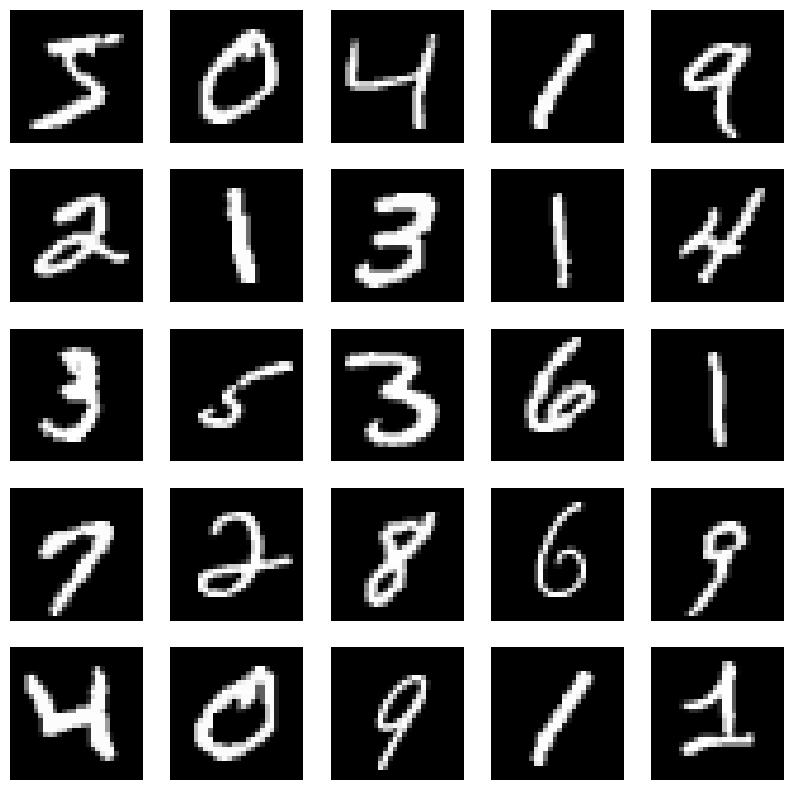

In [39]:
# Display the first 25 training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [40]:
# Create a sequential model
model = models.Sequential()

# Add a flatten layer to convert the input shape to a 1D array
model.add(layers.Flatten(input_shape=(28, 28)))

# Add a dense layer with 128 units and ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Add another dense layer with 128 units and ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Add a dense layer with 10 units and softmax activation function for classification
model.add(layers.Dense(10, activation='softmax'))

In [41]:
#Compiles the model with the specified optimizer, loss function, and metrics.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
# Train the model and store the training history
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.8416 - accuracy: 0.8656 - val_loss: 0.4767 - val_accuracy: 0.9124
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3653 - accuracy: 0.9247 - val_loss: 0.3317 - val_accuracy: 0.9317
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2248 - accuracy: 0.9423 - val_loss: 0.2145 - val_accuracy: 0.9480
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1781 - accuracy: 0.9514 - val_loss: 0.2334 - val_accuracy: 0.9427
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1599 - accuracy: 0.9551 - val_loss: 0.1959 - val_accuracy: 0.9535
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1415 - accuracy: 0.9608 - val_loss: 0.1795 - val_accuracy: 0.9582
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1262 - accuracy: 0.9639 - val_loss: 0.1917 - val_accuracy:

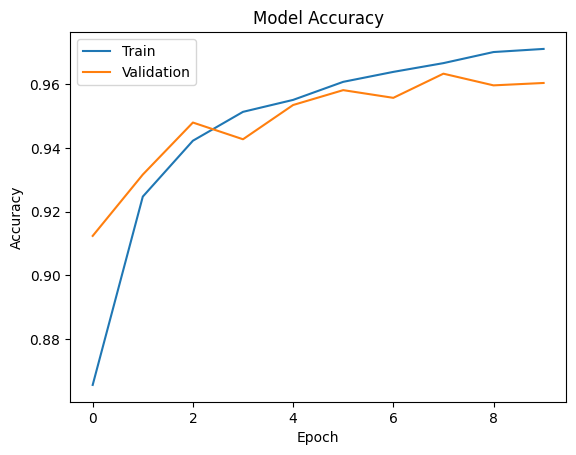

In [43]:
# Plot the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 - 0s - loss: 0.1677 - accuracy: 0.9617 - 400ms/epoch - 1ms/step
313/313 [==============================] - 0s 1ms/step


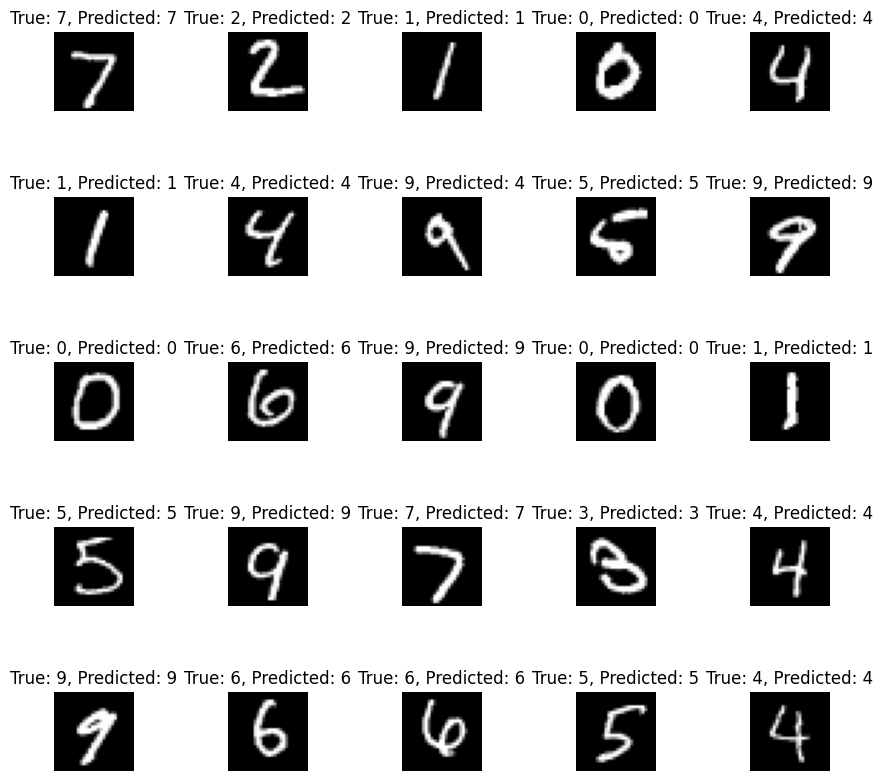

In [44]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Make predictions
predictions = model.predict(test_images)

# Visualize the evaluation results
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {test_labels[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.subplots_adjust(wspace=1.2, hspace=0.5)  # Adjust the spacing between subplots
plt.show()